## Notebook 4B  - Mon/Tues
### Importing and analyzing data collected from your smart phone
### Total points: 7
#### PHYS 225 Intro to Computational Physics, Fall 2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Task 1: Collecting your own data (1 pt)
Each person should collect data sets in the elevator or stairs going 3rd floor to A level and back to 3rd floor. Take one continuous data set for up and down. If you are remote, do the same thing in your dorm or apartment, go from the highest point to the lowest point and back. 

You can collect both at the same time in the phyphox app using the "+" button to **Add a simple experiment**.  You should collect
* **Pressure**, get raw data from the barometer
* **Acceleration with g**, get raw data from the accelerometer

When you **export data** from the app, choose **CSV** format, not Excel.

Once you share the data and upload it, you **must rename the data files** as 
`my_pressure_data.csv` and `my_acceleration_data.csv`

In [29]:
""" Checks that you saved files with the right names """
import os
print(os.getcwd())
assert "my_pressure_data.csv" in os.listdir()
assert "my_acceleration_data.csv" in os.listdir()

/home/bmzsps/PHYS225/source/PS4B


AssertionError: 

## Viewing your own data
It is a great idea to open your data file as a text file (rather than data) to see how it is structured. Using the Jupyter notebook file navigator, a data file might appear as
![Example data file preview](Text_view_of_data.JPG)
# Task 2: View your own data before importing (1 pt)
Open your two data files `my_pressure_data.csv` and `my_acceleration_data.csv` via the Jupyter notebook file navigator and use the view of the raw text to answer the following questions:

1. What character (e.g., letter/symbol) separates the columns?
1. How many rows is the header (column names and units).
1. How many columns?
1. What are the quantities and units for each of the columns?

## Importing data
Numpy comes with a function `np.loadtxt()`, which we will use to import tables of data into numpy arrays. Once the data is imported into an array, we can do analysis and plotting. The function syntax is:

`np.loadtxt(fname, delimiter=None, skiprows=0)`  

The three function arguments we need most frequently are:
* `fname` must be a string that contains the file name. If the file is in the same directory as the Jupyter notebook you do not need to provide a full path.
* `delimiter` is the characted used to separate columns. For .CSV file the delimiter should be a comma but it could be a space or tab sometimes.
* `skiprows` is used to skip header rows. The default value is 0. If you try to import a header row, it will typically fail since header is a string, not a number.

A full list of options can be found at the [official numpy documentation for loadtxt()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html).

### Example of np.loadtxt()

In [30]:
# load the files into press_data
press_data = np.loadtxt("Pressure_stairs.csv", delimiter = ",", skiprows=1)
acc_data = np.loadtxt("Accelerometer_stairs.csv", delimiter = ",", skiprows=1)

# print the first 10 rows
print(press_data[1:10])  

[[5.09033200e-02 1.00595544e+03]
 [8.93859860e-02 1.00595544e+03]
 [1.27807617e-01 1.00595544e+03]
 [1.66290283e-01 1.00596582e+03]
 [2.04711914e-01 1.00596582e+03]
 [2.43316650e-01 1.00596582e+03]
 [2.81616211e-01 1.00596582e+03]
 [3.20068359e-01 1.00598132e+03]
 [3.58489990e-01 1.00598132e+03]]


# Task 3: Importing data (1 pt)

1. Import your pressure data from `my_pressure_data.csv` to a numpy array named `my_press`
1. Import your acceleration data from `my_acceleration_data.csv` to a numpy array named `my_acc`

In [31]:
"""
Import my_press and my_acc
"""

### BEGIN SOLUTION
my_press = np.loadtxt("Pressure_stairs.csv", delimiter = ",", skiprows=1)
my_acc = np.loadtxt("Accelerometer_stairs.csv", delimiter = ",", skiprows=1)

### END SOLUTION

In [32]:
""" Check imported arrays my_press and my_acc """
assert my_press.shape[1] == 2  # pressure data should have two columns
assert my_acc.shape[1] >= 4 # acceleration data should have 4+ columns (time, ax, ay, az, ...)
assert my_press.shape[0] > 20 # pressure data should have lots of rows
assert my_acc.shape[0] > 50 # acceleration data should have lots of rows

## Plotting data 
This example plots the raw data from the pressure sensor. The units are a bit wierd...hecto Pascals (100's of Pa) on Android exported data.  
The data records someone walking from the 3rd floor down to the 1st floor and back up to 3rd floor. The person used the main stairwell by the Dean's office and slowed down at each landing it could be seen which parts were steps.

Text(0, 0.5, 'Pressure (hPa)')

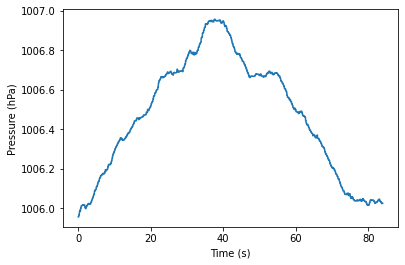

In [33]:
# example
plt.plot(press_data[:,0], press_data[:,1])
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")

*Why does the pressure increase and then decrease?*

# Task 4: Plotting your own data (1 pt)
Create two separate plots of
1. Pressure vs time using `my_press` data
1. Acceleration vs time using `my_acc` data.
The plot of acceleration should include $x$, $y$, and $z$ components with a legend labeling each component.

Use `plt.figure()` to create a new figure after the pressure vs time plot. Do this to ensure the acceleration and pressure data don't end up on the same plot.

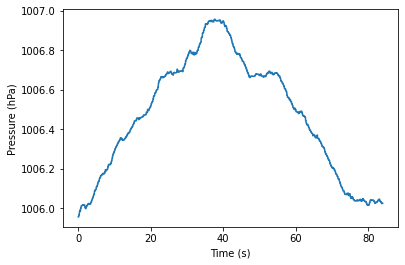

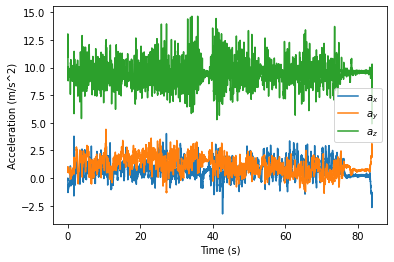

In [34]:

plt.plot(my_press[:,0], my_press[:,1])
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")

plt.figure()
plt.plot(my_acc[:,0], my_acc[:,1], label="$a_x$")
plt.plot(my_acc[:,0], my_acc[:,2], label="$a_y$")
plt.plot(my_acc[:,0], my_acc[:,3], label="$a_z$")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.legend()


## Subplots
Subplots allow for plotting data on separate axes, typically to pick an optimal scale for each of the axes separately. 

### Example from a simple harmonic oscillator

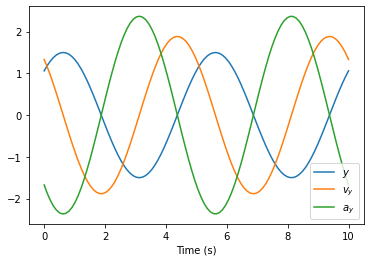

In [35]:
A = 1.5 # amplitude
phi = np.pi/4  # phase shift
T = 5  # period
w = 2 * np.pi / T  # angular frequency

t = np.linspace(0,10,100)  # create array of time values
y = A * np.sin( w * t + phi )
vy = w * A * np.cos( w * t + phi )
ay = -w**2 * A * np.sin( w * t + phi )

plt.plot(t,y, label="$y$")
plt.plot(t,vy, label = "$v_y$")
plt.plot(t,ay, label = "$a_y$")
plt.xlabel("Time (s)")
plt.legend()

Text(0.5, 0, 'Time (s)')

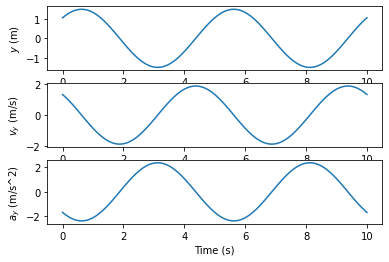

In [36]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(t,y)
plt.ylabel("$y$ (m)")

plt.subplot(3,1,2)
plt.plot(t,vy)
plt.ylabel("$v_y$ (m/s)")

plt.subplot(3,1,3)
plt.plot(t,ay)
plt.ylabel("$a_y$ (m/s^2)")
plt.xlabel("Time (s)")

# Task 5: Plot your acceleration data using three subplots for the three components $\vec{a}$ (1 pt)
Re-plot your acceleration data as a set of 3 subplots (3 rows, 1 column). Use the above plot as an example.

Text(0.5, 0, 'Time (s)')

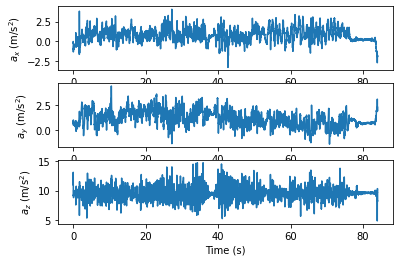

In [37]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(my_acc[:,0],my_acc[:,1])
plt.ylabel("$a_x$" + " (m/s$^2$)")

plt.subplot(3,1,2)
plt.plot(my_acc[:,0],my_acc[:,2])
plt.ylabel("$a_y$" + " (m/s$^2$)")

plt.subplot(3,1,3)
plt.plot(my_acc[:,0],my_acc[:,3])
plt.ylabel("$a_z$" + " (m/s$^2$)")
plt.xlabel("Time (s)")

# Task 6: Define a function `p_to_h()` to convert pressure to height (altitude) (1 pt)
According to the website [Engineering Toolbox](https://www.engineeringtoolbox.com/air-altitude-pressure-d_462.html), the pressure is related to the altitude according to the following equation:

Air pressure above sea level can be calculated as

$p = 101325 (1 - 2.25577\times10^{-5} h)^{5.25588}$

where
* 101325 = normal temperature and pressure at sea level (Pa)
* $p$ = air pressure (Pa)
* $h$ = altitude above sea level (m)

Define a function that inverts this relationship to give height as a function of pressure.

**Function Name:** `p_to_h()`

**Input:** `pressure` in Pascals

**Output:** `height` in meters

In [42]:
""" define the function p_to_h()"""

### BEGIN SOLUTION
def p_to_h(pressure) :
    height = (1 - (pressure/101325)**(1/5.25588))/2.25577e-5
    return height

print( p_to_h( 101325 ) )
print( p_to_h( 100720 ) )
print( p_to_h( 99600 ) )
### END SOLUTION

0.0
50.483667718799104
144.5926782580673


In [39]:
""" test the p_to_h() function """

assert abs( p_to_h( 101325 ) ) < 1e-2
assert abs(p_to_h( 100720 )  - 50.4836677) < 1e-2

# Task 7: Analysis of your pressure vs time data (1 pt)

1. **Create an array** `heights` that is calculated using the `p_to_h()` function and pressure column of `my_press` array to heights.
1. Create a plot of `heights` vs time with all labeled.


-8.373778866158744


-27.473027776111365

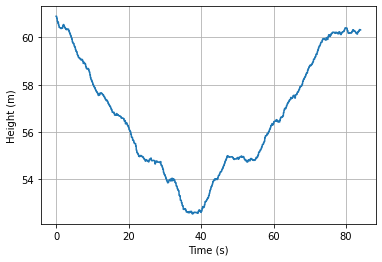

In [41]:
""" Calculate array named heights
    Make a plot of heights vs time """

### BEGIN SOLUTION
heights = p_to_h(my_press[:,1] * 100)  # convert to hectopascals

plt.plot(my_press[:,0], heights)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.grid()

print(heights.min() - heights.max())
( heights.min() - heights.max() ) * 100/2.54/12
### END SOLUTION

In [25]:
"""Test cases for the array heights"""

assert len(heights) == len(my_press[:,0])

# are your heights reasonable? Look closely at the y-axis of your plot.
# if you fail this, you calculated heights 1 mile. 
# check the data file to look at units on Pressure
assert heights.max() < 2000  
#make sure the height change was at least 1 meter.
assert heights.max() - heights.min() > 1

## Task 8: Select a raw sensor and collect data and analyze it (2 pt)

This is a chance to play around with the sensors. Here's a few ideas to help you get started, but feel free to choose your own. 
* Can I use the magnetometer as a compass? What happens if you rotate 360 or 720 degrees? Can you find North?
* Can I draw a shape by walking around with the GPS sensor turned on?
* If I hold my phone away from my body and spin around, can the accelerometer measure the centripetal acceleration? Could I measure both the gyroscope and accelerometer to show that $a_c = \omega^2 R$?

**Here are the minimum things you must do:**
1. Collect data and upload it
1. Import it
1. Plot it
1. Discuss your plot in the Markdown cell at the bottom.



**In the cell below**
* Describe the physical situation. What you were doing when you collected the data? How was the phone oriented? What was it doing? 
* Interpret the data and show how it makes sense in light of what you were doing when the data was collected.